In [1081]:
import numpy as np
import matplotlib.pyplot as plt

In [1082]:
import os
import shutil
import time

# Plot Occupation ratio of +1 domain

$$ratio = \frac12(<u>+1)$$

It corresponds to make an integral after shifting of +1 the tanh (such that)

In [1083]:
dt = 0.1
tspan = 1000
tspan/dt

10000.0

In [1084]:
T = 25
C0 = 1
A = 0.1

In [1085]:
dx = 0.1
L = 100

In [1086]:
title = "Single kink\n$C = "+ str(C0) + " + "+str(A)+"*sin(2\pi t/"+str(T)+")$\n"
title = title + "dt = " + str(dt) + " dx = " + str(dx) + " L = " + str(L)

In [1087]:
t_min = 5*T
t_max = 6*T

(125.0, 150.0)

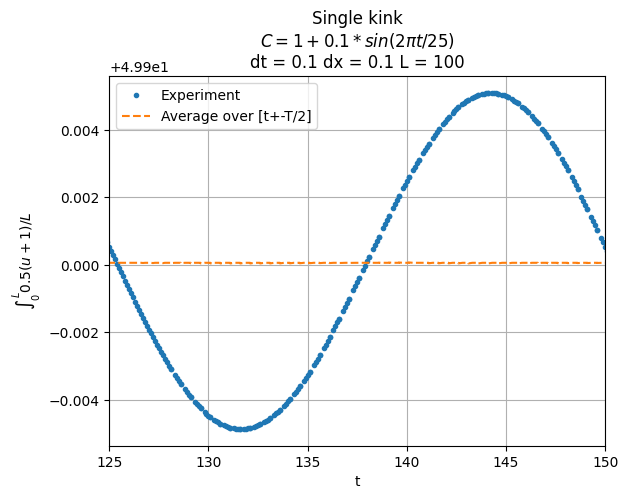

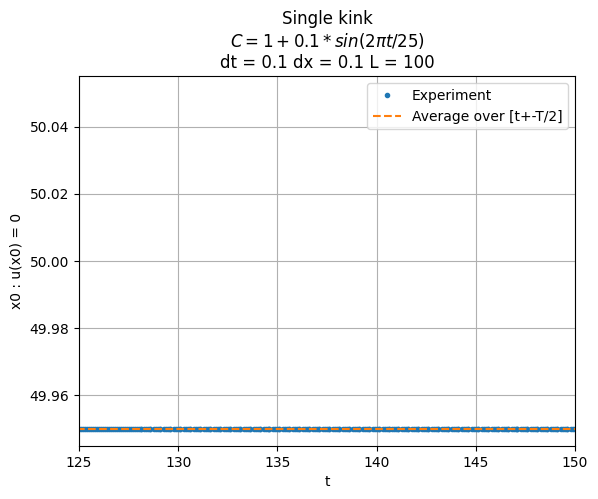

In [1088]:
# Read u average at any time
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    i = i + 1

# Read x0 (interface position, where u=0)
f = open("../filex0.dat", "r")
x0s = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    #tt[i] = float(a)
    x0s[i] = float(b)
    i = i + 1


if(N-i != 0):
    print("WARNING: dt or tspan is incorrect!")

# The area under the +1 domain (works if u=tanh without amplitude changing or different from 1!!!)
area = (ave+np.ones(N))*L/2
l = np.zeros(len(area)) # Normalize the area respect to the simulation lenght L
for i in np.arange(0, len(area)):
    l[i] = area[i]/L

# Times to plot
ts = np.arange(0, tt[len(tt)-1], dt)
ns = np.arange(0, len(ts))
for i in np.arange(0,len(ns)):
    ns[i] = int(ts[i]/dt)
#ts = np.arange(0, i, int(T/dt))

# Analytical expected result
#e2l_anal = -48*tt
#ax.plot(tt[ns], e2l_anal[ns], "--", label="Analytical kink collapse")

# Calculate the average over a period
nT = int(T/dt)  # Number of steps corresponding to a period
avex0_T = np.zeros(len(l)-nT)
avearea_T = np.zeros(len(l)-nT)
nsave = np.arange(0,len(tt)-nT)
for i in np.arange(0, len(l)):
    if i >= nT:
        avex0_T[i-nT] = np.average(x0s[ns[i-nT]:ns[i]])
        avearea_T[i-nT] = np.average(area[ns[i-nT]:ns[i]])
        nsave[i-nT] = ns[int(i-nT/2)]

# Area of +1 domain
fig, ax = plt.subplots()
ax.plot(tt[ns], area[ns],'.', label="Experiment")
ax.set_xlabel("t")
ax.set_ylabel("$\int_0^L 0.5(u+1)/L$")
ax.grid()
ax.set_title(title)

ax.plot(tt[nsave], avearea_T, "--", label="Average over [t+-T/2]")
ax.set_xscale("linear")
#ax.set_yscale("log")

# x0 Interface position
fig_, ax_ = plt.subplots()
ax_.plot(tt[ns], x0s[ns],'.', label="Experiment")
ax_.set_xlabel("t")
ax_.set_ylabel("x0 : u(x0) = 0")
ax_.grid()
ax_.set_title(title)

ax_.plot(tt[nsave], avex0_T, "--", label="Average over [t+-T/2]")
ax_.set_xscale("linear")
#ax.set_yscale("log")


ax.legend()
ax.set_xlim(t_min,t_max)
ax_.legend()
ax_.set_xlim(t_min,t_max)

#ax.set_ylim(49.96,49.97)
#ax_.set_ylim(49.96,49.97)

### C(t)

(125.0, 150.0)

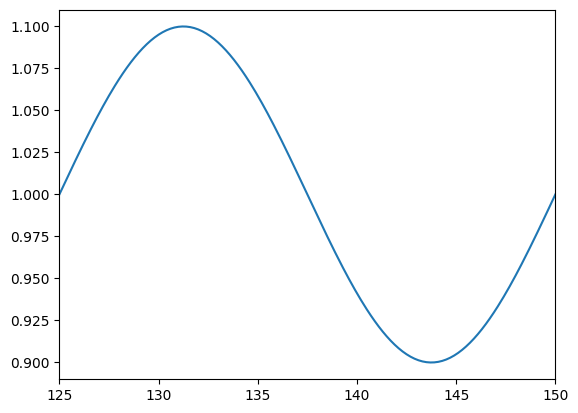

In [1089]:
# Read u average at any time
f = open("../fileCout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N+1)
Cs = np.zeros(N+1)
i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    Cs[i] = float(b)
    i = i + 1
plt.plot(tt, Cs)

plt.xlim(t_min, t_max)


## Measure the oscillations in the occupation ratio (so in the interface position)
For different values of the parameters

In [1090]:
import os
import shutil
import time

In [1091]:
f = open("x0 vs oscillation.txt", "a")
f.write(str(x0) + " " + str())
f.close()

In [1092]:
#fig_, ax_ = plt.subplots()
ax_.set_xlabel("x0")
ax_.set_ylabel("oscillation amplitude 0.5 - ratio(t="+str(t_plot)+")")
t_plot = 482.5
i_plot = int(t_plot/dt)
ax_.plot(x0, 0.5-l[i_plot], ".-")